# Resume Classification P-158

## Objective 

The resume classification solution should significantly reduce the manual human effort in the Human Resource Management (HRM). 
The goal is to come up with a classification model which will predict the category of the resume.

In [1]:
# basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
#nltk
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download(['stopwords','wordnet'])


#warning
import warnings 
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Paresh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Paresh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is AC64-25E6

 Directory of C:\Users\Paresh\OneDrive\Documents\DataScience_Projects\Resume_Classification_P145

03-11-2022  11:35    <DIR>          .
30-10-2022  17:12    <DIR>          ..
03-11-2022  11:31    <DIR>          .ipynb_checkpoints
31-10-2022  10:48         2,432,129 knn.sav
05-10-2022  17:40            49,619 Requirement document- Document Classification (1).docx.pdf
03-11-2022  11:30         2,878,936 Resume_Classification_P158_1.ipynb
03-11-2022  11:15         2,815,739 Resume_Classification_P158_2.ipynb
02-11-2022  15:40         2,140,816 Resume_Classification_P158_3.ipynb
03-11-2022  11:35         2,852,775 Resume_Classification_P158_github.ipynb
01-11-2022  17:06             7,270 resume_classification_st_app_1.py
01-11-2022  16:53             6,378 resume_classification_st_app_2.py
01-11-2022  18:21             7,762 resume_classification_st_app_3.py
03-11-2022  11:29           421,419 resume_data.csv
10-10-2022 

In [4]:
# Getting list of paths of all the resumes
import os
for resume, _, filenames in os.walk(r'C:\Users\Paresh\OneDrive\Documents\DataScience_Projects\Resume_Classification_P145\Resumes'):
    for filename in filenames:
        print(os.path.join(resume, filename))

C:\Users\Paresh\OneDrive\Documents\DataScience_Projects\Resume_Classification_P145\Resumes\Anil kumar.docx
C:\Users\Paresh\OneDrive\Documents\DataScience_Projects\Resume_Classification_P145\Resumes\AradhanaTripathi[4_0].docx
C:\Users\Paresh\OneDrive\Documents\DataScience_Projects\Resume_Classification_P145\Resumes\Buddha Vamsi.docx
C:\Users\Paresh\OneDrive\Documents\DataScience_Projects\Resume_Classification_P145\Resumes\ChinnaSubbarayuduM_Hexaware.docx
C:\Users\Paresh\OneDrive\Documents\DataScience_Projects\Resume_Classification_P145\Resumes\Gopi Krishna_Hexaware.docx
C:\Users\Paresh\OneDrive\Documents\DataScience_Projects\Resume_Classification_P145\Resumes\Hari Krishna M_Hexaware.doc
C:\Users\Paresh\OneDrive\Documents\DataScience_Projects\Resume_Classification_P145\Resumes\Harikrishna Akula_Hexaware.doc
C:\Users\Paresh\OneDrive\Documents\DataScience_Projects\Resume_Classification_P145\Resumes\Hima Mendu_Hexaware.doc
C:\Users\Paresh\OneDrive\Documents\DataScience_Projects\Resume_Class

# Extracting text from docx, doc & pdf using Tika library

### Apache Tika is a library that is used for document type detection and content extraction from various file formats.

In [5]:
# Install Tika
#!pip install tika 

# Import the libraries
from tika import parser 
import requests
import tika

In [6]:
# Testing the library on only one document
txt = parser.from_file(r"C:\Users\Paresh\OneDrive\Documents\DataScience_Projects\Resume_Classification_P145\Resumes\Anil kumar.docx")
print(txt['content'])
















































ANIL KUMAR MADDUKURI  		
SQL & MSBI Developer   

	

Summary

· 2.4 years of experience in MS SQL Server (SSMS) and creating SSIS packages, SSRS Reports by using Microsoft Business Intelligence (MSBI) tools.
· Expertise in various types of Joins and Sub Queries for writing complex queries involving multiple tables.
· Handled data manipulation and data consistency by creating Views, Triggers, and Synonyms.
· Hands on experience in creation, optimization and debugging Stored Procedure and Functions.
· Familiar in writing queries using CTE, Temporary Tables and Table Variables.
· Good experience in using Set Operators like Union, Union All, Except and Intersect to assist required data.
· Experience in manipulate the data from multiple table and report to the client using Aggregate Functions, Windows Functions and String Functions.
· Worked extensively on Data Extraction, Transformation and Loading (ETL) process in SQL Server Integration Servi

In [7]:
# Converting all formats of resumes to text format using TIKA library

for resume, _, filenames in os.walk(r'C:\Users\Paresh\OneDrive\Documents\DataScience_Projects\Resume_Classification_P145\Resumes'):
    ex_txt = []
    for filename in filenames:
        path = os.path.join(resume, filename)
        txt = parser.from_file(path)
        ex_txt = [r.replace("\n", "") for r in ex_txt]
        ex_txt = [r.replace("\r", "") for r in ex_txt]
        ex_txt = [r.replace("\t", "") for r in ex_txt]
        ex_txt = [r.replace(r"\x", "") for r in ex_txt]
        ex_txt.append(txt['content'])

In [8]:
ex_txt

['ANIL KUMAR MADDUKURI  SQL & MSBI Developer   Summary· 2.4 years of experience in MS SQL Server (SSMS) and creating SSIS packages, SSRS Reports by using Microsoft Business Intelligence (MSBI) tools.· Expertise in various types of Joins and Sub Queries for writing complex queries involving multiple tables.· Handled data manipulation and data consistency by creating Views, Triggers, and Synonyms.· Hands on experience in creation, optimization and debugging Stored Procedure and Functions.· Familiar in writing queries using CTE, Temporary Tables and Table Variables.· Good experience in using Set Operators like Union, Union All, Except and Intersect to assist required data.· Experience in manipulate the data from multiple table and report to the client using Aggregate Functions, Windows Functions and String Functions.· Worked extensively on Data Extraction, Transformation and Loading (ETL) process in SQL Server Integration Services.· Used containers such as for each loop container and sequ

In [9]:
# Function for converting list into list of lists
def list_of_list(lst):
    result = []
    for element in lst:
        sub = element.split(', ')
        result.append(sub)
      
    return(result)

In [10]:
print(list_of_list(ex_txt))

[['ANIL KUMAR MADDUKURI  SQL & MSBI Developer   Summary· 2.4 years of experience in MS SQL Server (SSMS) and creating SSIS packages', 'SSRS Reports by using Microsoft Business Intelligence (MSBI) tools.· Expertise in various types of Joins and Sub Queries for writing complex queries involving multiple tables.· Handled data manipulation and data consistency by creating Views', 'Triggers', 'and Synonyms.· Hands on experience in creation', 'optimization and debugging Stored Procedure and Functions.· Familiar in writing queries using CTE', 'Temporary Tables and Table Variables.· Good experience in using Set Operators like Union', 'Union All', 'Except and Intersect to assist required data.· Experience in manipulate the data from multiple table and report to the client using Aggregate Functions', 'Windows Functions and String Functions.· Worked extensively on Data Extraction', 'Transformation and Loading (ETL) process in SQL Server Integration Services.· Used containers such as for each loop

In [11]:
# Creating a dataframe containing all text resumes

df = pd.DataFrame(ex_txt)
df.rename(columns={0:'resume'},inplace=True)
df

,resume
0,ANIL KUMAR MADDUKURI SQL & MSBI Developer S...
1,CURRICULUM VITAEAradhana TripathiCurrent Locat...
2,BUDDHA VAMSI ...
3,Chinna Subbarayudu MDOB: 06th March 1994Nation...
4,Name : Gopi Krishna Reddy ...
...,...
74,WORKDAY | HCM | FCMName : Kumar S.SRole : Work...
75,Tatikonda Kiran Kumar.Career objectiveA reward...
76,Mathu Kumaran Venkateswarlu.BWorkday Consultan...
77,...


In [12]:
data = pd.read_csv('resume_data.csv',header=None)
data

,0,1
0,ANIL KUMAR MADDUKURI SQL & MSBI Developer S...,SQL Developer
1,CURRICULUM VITAEAradhana TripathiCurrent Locat...,SQL Developer
2,BUDDHA VAMSI ...,SQL Developer
3,Chinna Subbarayudu MDOB: 06th March 1994Nation...,Workday Consultant
4,Name : Gopi Krishna Reddy ...,Workday Consultant
...,...,...
74,WORKDAY | HCM | FCMName : Kumar S.SRole : Work...,Workday Consultant
75,Tatikonda Kiran Kumar.Career objectiveA reward...,SQL Developer
76,Mathu Kumaran Venkateswarlu.BWorkday Consultan...,Workday Consultant
77,...,Workday Consultant


In [13]:
data.rename(columns={0:'resume',1:'category'},inplace=True)
data

,resume,category
0,ANIL KUMAR MADDUKURI SQL & MSBI Developer S...,SQL Developer
1,CURRICULUM VITAEAradhana TripathiCurrent Locat...,SQL Developer
2,BUDDHA VAMSI ...,SQL Developer
3,Chinna Subbarayudu MDOB: 06th March 1994Nation...,Workday Consultant
4,Name : Gopi Krishna Reddy ...,Workday Consultant
...,...,...
74,WORKDAY | HCM | FCMName : Kumar S.SRole : Work...,Workday Consultant
75,Tatikonda Kiran Kumar.Career objectiveA reward...,SQL Developer
76,Mathu Kumaran Venkateswarlu.BWorkday Consultan...,Workday Consultant
77,...,Workday Consultant


# EDA

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   resume    79 non-null     object
 1   category  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [15]:
data.category.value_counts()

React JS Developer    22
Workday Consultant    20
SQL Developer         15
Peoplesoft Admin       9
Peoplesoft FSCM        6
Peoplesoft Finance     3
Internship             2
Peoplesoft DBA         2
Name: category, dtype: int64

### The data contains in total 8 categories 

### Value Count 

<AxesSubplot:>

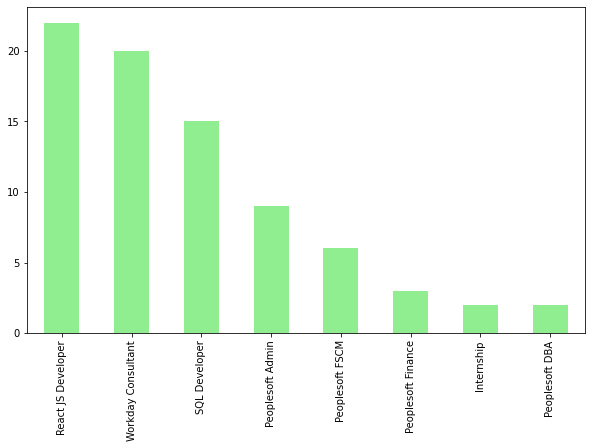

In [16]:
plt.figure(figsize=(10,6))
data.category.value_counts().plot(kind='bar',color='lightgreen')

### Count Plot

<AxesSubplot:xlabel='count', ylabel='category'>

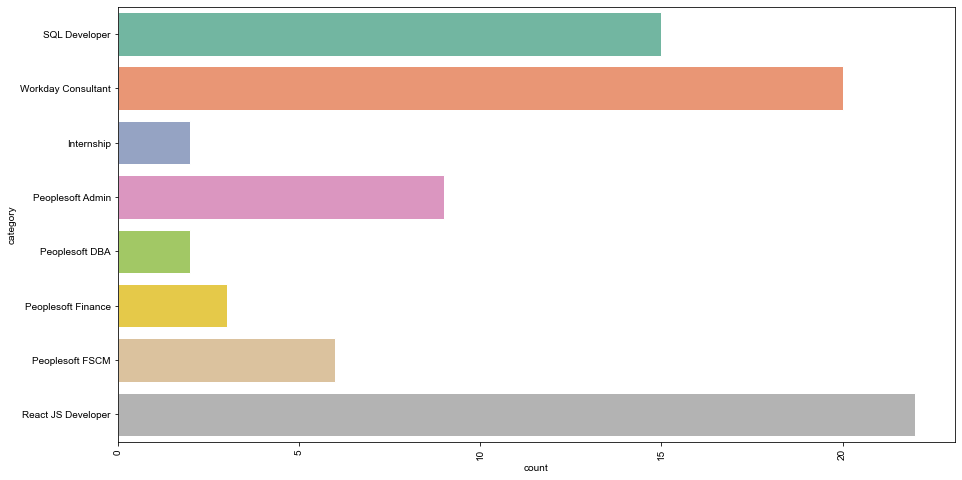

In [17]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sn.set_theme(style='darkgrid')
sn.set_palette("Set2")
sn.countplot(y="category", data= data)

### Pie Chart

In [19]:
data.category.unique()

array(['SQL Developer', 'Workday Consultant', 'Internship',
       'Peoplesoft Admin', 'Peoplesoft DBA', 'Peoplesoft Finance',
       'Peoplesoft FSCM', 'React JS Developer'], dtype=object)

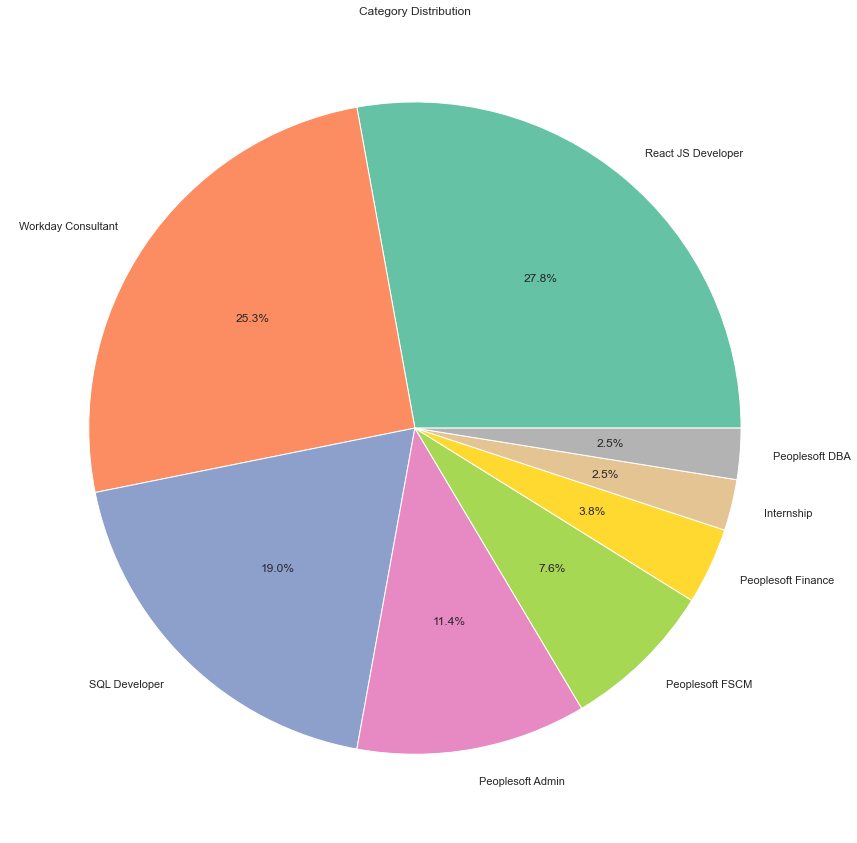

In [20]:
targetCounts = data['category'].value_counts()
targetLabels  = ['React JS Developer', 'Workday Consultant', 'SQL Developer', 'Peoplesoft Admin', 'Peoplesoft FSCM',
                  'Peoplesoft Finance', 'Internship', 'Peoplesoft DBA' ]
plt.figure(figsize=(15,15))
plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%')
plt.title("Category Distribution")
plt.show()

# Preprocessing and Cleaning the data

1. Removing special characters such s \n, \r, \t
2. Keeping only alphabets
3. Removing URLs, hashtags, mentions and extra whitespaces
4. Converting all characters to lower case
5. Removing the stopwords
6. Stemming and Lemmetization

In [21]:
# Creating a function for preprocessing the text
import nltk
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer

def preprocess(txt):
    # replace \n & \r & \t with space
    txt = re.sub(r'[\n\r\t]*', '', txt)
    # convert all characters in the string to lower case
    txt = txt.lower()
    # remove non-english characters, punctuation and numbers
    txt = re.sub('[^a-zA-Z]', ' ', txt)
    txt = re.sub('http\S+\s*', ' ', txt)  # remove URLs
    txt = re.sub('RT|cc', ' ', txt)  # remove RT and cc
    txt = re.sub('#\S+', '', txt)  # remove hashtags
    txt = re.sub('@\S+', '  ', txt)  # remove mentions
    txt = re.sub('\s+', ' ', txt)  # remove extra whitespace
    # tokenize word
    txt = nltk.tokenize.word_tokenize(txt)
    # remove stop words
    txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]
    # Lemmetization
    txt = [WordNetLemmatizer().lemmatize(word) for word in txt]
    # Joining the words
    txt = " ".join(txt)

    return txt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Paresh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
data['clean_resume'] = data['resume'].apply(lambda x: preprocess(x))

In [23]:
data

,resume,category,clean_resume
0,ANIL KUMAR MADDUKURI SQL & MSBI Developer S...,SQL Developer,anil kumar maddukuri sql msbi developer summar...
1,CURRICULUM VITAEAradhana TripathiCurrent Locat...,SQL Developer,curriculum vitaearadhana tripathicurrent locat...
2,BUDDHA VAMSI ...,SQL Developer,buddha vamsi career objective year experience ...
3,Chinna Subbarayudu MDOB: 06th March 1994Nation...,Workday Consultant,chinna subbarayudu mdob th march nationality i...
4,Name : Gopi Krishna Reddy ...,Workday Consultant,name gopi krishna reddy professional summery w...
...,...,...,...
74,WORKDAY | HCM | FCMName : Kumar S.SRole : Work...,Workday Consultant,workday hcm fcmname kumar srole workday consul...
75,Tatikonda Kiran Kumar.Career objectiveA reward...,SQL Developer,tatikonda kiran kumar career objectivea reward...
76,Mathu Kumaran Venkateswarlu.BWorkday Consultan...,Workday Consultant,mathu kumaran venkateswarlu bworkday consultan...
77,...,Workday Consultant,vinay kumar vworkday functional consultantexpe...


### Word Cloud 

In [24]:
#pip install wordcloud

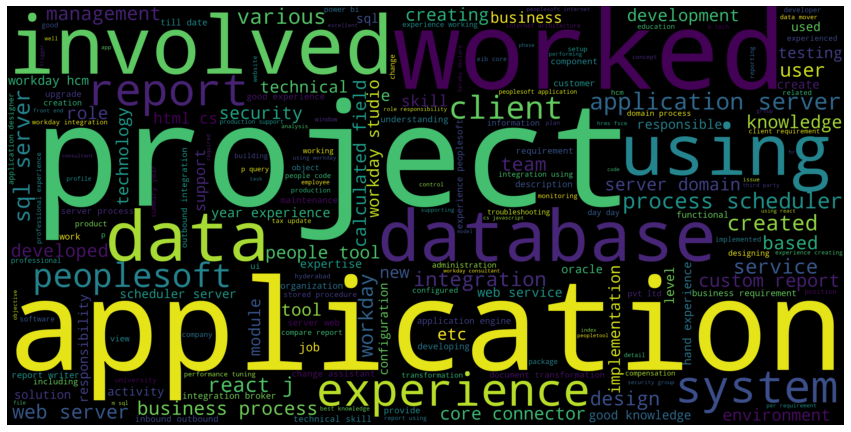

In [25]:
from wordcloud import WordCloud
plt.figure(figsize=(15,15))
txt = ' '.join(txt for txt in data['clean_resume'])
wordcloud = WordCloud(height=2000,width=4000).generate(txt)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
# Saving all categories in a variable and sorting it
categories = np.sort(data.category.unique())
categories

array(['Internship', 'Peoplesoft Admin', 'Peoplesoft DBA',
       'Peoplesoft FSCM', 'Peoplesoft Finance', 'React JS Developer',
       'SQL Developer', 'Workday Consultant'], dtype=object)

In [27]:
# Creating a dataframe contaning the categories in ascending order and their respective Resumes
df_categories = [data[data['category'] == category].loc[:,['clean_resume','category']] for category in categories]
df_categories

[                                         clean_resume    category
 9   name ravali p curriculum vitae specialization ...  Internship
 10  susovan bag seeking challenging position field...  Internship,
                                          clean_resume          category
 20  anubhav kumar singhcore competency scripting s...  Peoplesoft Admin
 21  profile summary year experience implementing u...  Peoplesoft Admin
 22  peoplesoft database administratorpeoplesoft da...  Peoplesoft Admin
 23  classification internalmuraliexperience summar...  Peoplesoft Admin
 24  priyanka ramadoss mountpleasant coonoorthe nil...  Peoplesoft Admin
 25  sirazmdsirazuddin mbangalore indiaprofile summ...  Peoplesoft Admin
 26  peoplesoft administratorsrinivas k experience ...  Peoplesoft Admin
 27  peoplesoft adminvarkala vikascareer objective ...  Peoplesoft Admin
 28  vinod akkala peoplesoft dba admin professional...  Peoplesoft Admin,
                                          clean_resume        categ

In [28]:
def wordcloud(df):
    txt = ' '.join(txt for txt in df['clean_resume'])
    wordcloud = WordCloud(height=2000, width=4000).generate(txt)
    return wordcloud

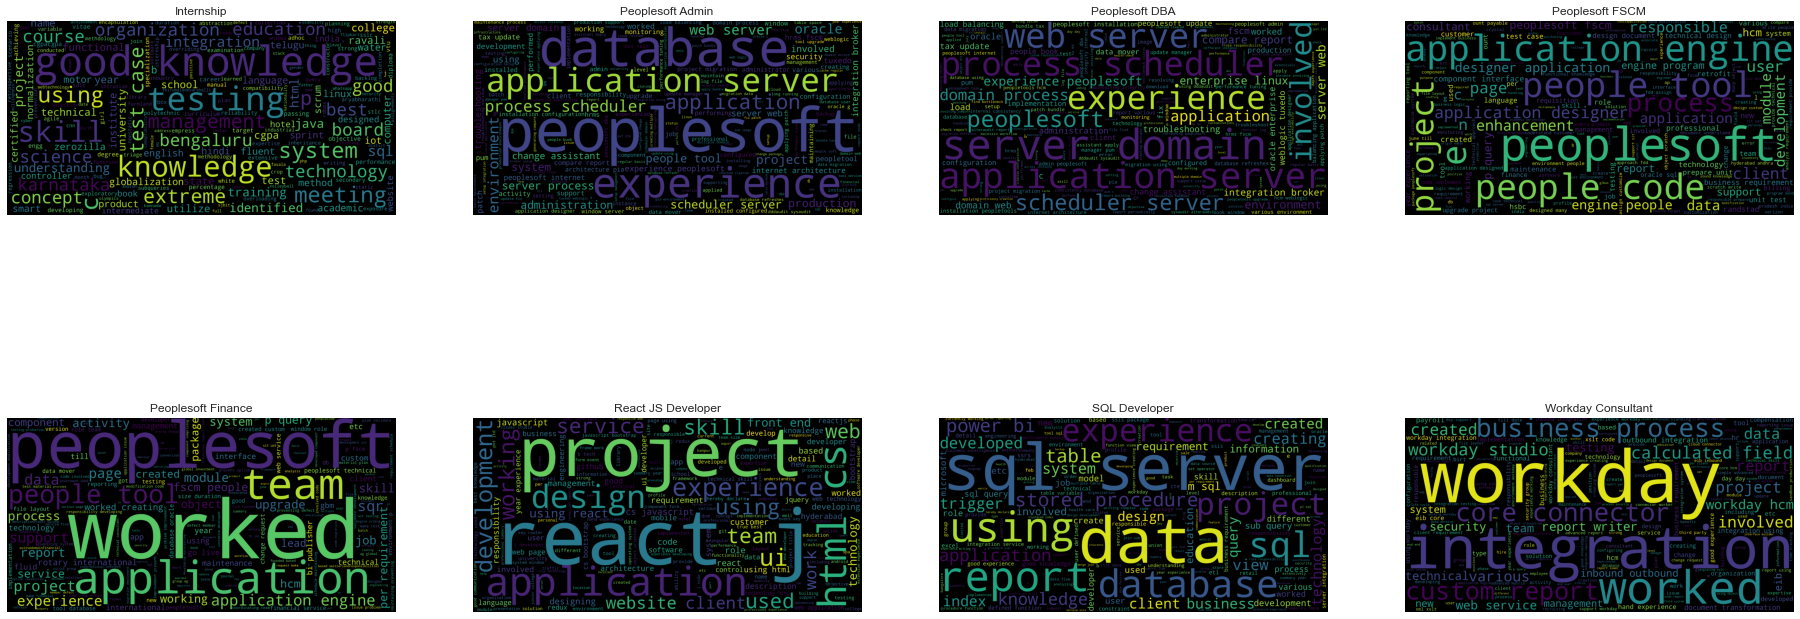

In [29]:
plt.figure(figsize=(32, 28))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(4, 4, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

# Model Building

### Label Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
label_encoder = LabelEncoder()
data['new_category'] = label_encoder.fit_transform(data['category'])

In [32]:
data.sample(10)

,resume,category,clean_resume,new_category
47,Ramesh A(Workday HCM Consultant)PROFESSIONAL...,Workday Consultant,ramesh workday hcm consultant professional sum...,7
77,...,Workday Consultant,vinay kumar vworkday functional consultantexpe...,7
72,Workday Integration ConsultantName : S...,Workday Consultant,workday integration consultantname sri krishna...,7
44,RAJU PAVANA KUMARIProfessional Summary:· Havi...,SQL Developer,raju pavana kumariprofessional summary year pr...,6
45,resumeRama...,SQL Developer,resumeramalakshmi k career objective professio...,6
19,VENKATA SAIKRISHNA Workday ConsultantPROFSSION...,Workday Consultant,venkata saikrishna workday consultantprofssion...,7
64,MAREEDU LOKESH BABUPROFESSIONAL OVERVIEW· A...,React JS Developer,mareedu lokesh babuprofessional overview aroun...,5
15,ResumeMooraboyina GuravaiahWorkday Integration...,Workday Consultant,resumemooraboyina guravaiahworkday integration...,7
73,Srikanth (WORKDAY hCM Consultant) ...,Workday Consultant,srikanth workday hcm consultant seeking suitab...,7
50,KAMALAKAR REDDY. A Linked In: https://www.link...,React JS Developer,kamalakar reddy linked www linkedin com kamala...,5


In [33]:
data.new_category.value_counts()

5    22
7    20
6    15
1     9
3     6
4     3
0     2
2     2
Name: new_category, dtype: int64

We can say that the data is imbalanced because some of the classes are having very less distribution in the data.

### TF-IDF Vectorizer

With the help of TF-IDF Vectorizer we will get the features for our classification model

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data.clean_resume.values).toarray()
X = pd.DataFrame(X, columns=tfidf.get_feature_names())

In [36]:
X     # Features for the model

,ab,abdul,ability,able,abreast,absence,absent,abstract,abstraction,ac,...,york,young,yr,zealand,zenefits,zenefitsworkday,zero,zerozilla,zone,zp
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.022204,0.0,0.0,0.100708,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.0,0.0,0.000000,0.0,0.0,0.020339,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75,0.0,0.0,0.025224,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
76,0.0,0.0,0.016109,0.0,0.0,0.048708,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.036007,0.0,0.0,0.0,0.0,0.0,0.0
77,0.0,0.0,0.024170,0.0,0.0,0.036541,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Columns: 4718 entries, ab to zp
dtypes: float64(4718)
memory usage: 2.8 MB


In [38]:
Y = data['new_category']
Y        # Target variable for model

0     6
1     6
2     6
3     7
4     7
     ..
74    7
75    6
76    7
77    7
78    6
Name: new_category, Length: 79, dtype: int32

### Train Test Split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=9)

In [41]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(63, 4718) (63,) (16, 4718) (16,)


# Training the models

In [42]:
# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Scores
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

### Logistic Regression

In [43]:
lr_model=LogisticRegression()
grid_params={'penalty':['l1', 'l2', 'elasticnet'],'max_iter':[100,500,1000,1500,2000],'random_state':[8]}
grid=GridSearchCV(lr_model,grid_params,cv=10,scoring='accuracy')
grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 500, 1000, 1500, 2000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'random_state': [8]},
             scoring='accuracy')

In [44]:
print("The best score is: ",grid.best_score_)
print("The best Parameters are: ",grid.best_params_)

The best score is:  0.738095238095238
The best Parameters are:  {'max_iter': 100, 'penalty': 'l2', 'random_state': 8}


In [45]:
# Creating model using the best params
lr_model=LogisticRegression(penalty='l2',max_iter=100,random_state=8)
lr_model.fit(X_train,Y_train)
lr_train_pred=lr_model.predict(X_train)
lr_acc=accuracy_score(Y_train,lr_train_pred)*100
print("The training accuracy for logistic regression model is: ",lr_acc)

The training accuracy for logistic regression model is:  85.71428571428571


In [46]:
# Classification Report for training data
print(classification_report(Y_train,lr_train_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.67      1.00      0.80         4
           2       0.00      0.00      0.00         2
           3       1.00      0.60      0.75         5
           4       0.00      0.00      0.00         2
           5       0.76      1.00      0.86        19
           6       1.00      0.90      0.95        10
           7       0.95      1.00      0.97        19

    accuracy                           0.86        63
   macro avg       0.55      0.56      0.54        63
weighted avg       0.80      0.86      0.82        63



### Decision Tree Classifier

In [47]:
dt_model=DecisionTreeClassifier()
grid_params={'criterion':['gini','entropy','log_loss'],'min_samples_split':[2,4,5,6,7,8],'random_state':[8]}
grid=GridSearchCV(dt_model,grid_params,cv=10,scoring='accuracy')
grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_split': [2, 4, 5, 6, 7, 8],
                         'random_state': [8]},
             scoring='accuracy')

In [48]:
print("The best score is: ",grid.best_score_)
print("The best Parameters are: ",grid.best_params_)

The best score is:  0.7976190476190477
The best Parameters are:  {'criterion': 'entropy', 'min_samples_split': 8, 'random_state': 8}


In [49]:
# Creating model using the best params
dt_model=DecisionTreeClassifier(criterion='entropy',min_samples_split=8,random_state=8)
dt_model.fit(X_train,Y_train)
dt_train_pred=dt_model.predict(X_train)
dt_acc=accuracy_score(Y_train,dt_train_pred)*100
print("The training accuracy for decision tree model is: ",dt_acc)

The training accuracy for decision tree model is:  92.06349206349206


In [50]:
# Classification Report for training data
print(classification_report(Y_train,dt_train_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.67      1.00      0.80         4
           2       0.00      0.00      0.00         2
           3       0.71      1.00      0.83         5
           4       0.00      0.00      0.00         2
           5       1.00      0.95      0.97        19
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        19

    accuracy                           0.92        63
   macro avg       0.63      0.74      0.68        63
weighted avg       0.88      0.92      0.90        63



### Random Forest Classifier

In [51]:
rf_model=RandomForestClassifier()
grid_params={'n_estimators':[10,20,50,100],'criterion':['gini','entropy','log_loss'],'min_samples_split':[2,5,6,7],'max_features':["sqrt", "log2"],'random_state':[8]}
grid=GridSearchCV(rf_model,grid_params,cv=10,scoring='accuracy')
grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 6, 7],
                         'n_estimators': [10, 20, 50, 100],
                         'random_state': [8]},
             scoring='accuracy')

In [52]:
print("The best score is: ",grid.best_score_)
print("The best Parameters are: ",grid.best_params_)

The best score is:  0.85
The best Parameters are:  {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'random_state': 8}


In [53]:
# Creating model using the best params
rf_model=RandomForestClassifier(criterion='entropy',max_features='sqrt', min_samples_split=2, n_estimators=10,random_state=8)
rf_model.fit(X_train,Y_train)
rf_train_pred=rf_model.predict(X_train)
rf_acc=accuracy_score(Y_train,rf_train_pred)*100
print("The training accuracy for random forest model is: ",rf_acc)

The training accuracy for random forest model is:  100.0


In [54]:
print(classification_report(Y_train,rf_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00        19
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        19

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



### K-Nearest Neighbors

In [55]:
knn_model=KNeighborsClassifier()
grid_params={'n_neighbors':[2,3,4,5,6,7,8,9]}
grid=GridSearchCV(knn_model,grid_params,cv=10,scoring='accuracy')
grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [56]:
print("The best score is: ",grid.best_score_)
print("The best Parameters are: ",grid.best_params_)

The best score is:  0.8619047619047618
The best Parameters are:  {'n_neighbors': 4}


In [57]:
# Creating model using the best params
knn_model=KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train,Y_train)
knn_train_pred=knn_model.predict(X_train)
knn_acc=accuracy_score(Y_train,knn_train_pred)*100
print("The training accuracy for logistic regression model is: ",knn_acc)

The training accuracy for logistic regression model is:  88.88888888888889


In [58]:
# Classification Report for training data
print(classification_report(Y_train,knn_train_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.67      1.00      0.80         4
           2       0.00      0.00      0.00         2
           3       0.71      1.00      0.83         5
           4       0.00      0.00      0.00         2
           5       0.95      1.00      0.97        19
           6       0.90      0.90      0.90        10
           7       0.95      1.00      0.97        19

    accuracy                           0.89        63
   macro avg       0.52      0.61      0.56        63
weighted avg       0.81      0.89      0.85        63



### Naive Bayes

In [59]:
nb_model=GaussianNB()
nb_model.fit(X_train,Y_train)
nb_train_pred=nb_model.predict(X_train)
nb_acc=accuracy_score(Y_train,nb_train_pred)*100
print("The training accuracy for logistic regression model is: ",nb_acc)

The training accuracy for logistic regression model is:  100.0


In [60]:
# Classification Report for training data
print(classification_report(Y_train,nb_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00        19
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        19

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



### Support Vector Classifier 

In [61]:
svc_model=SVC()
grid_params={'kernel':['rbf'],'C':[1,3,5,7,9,11],'gamma':[10,1,0.1,0.01,0.001,0.0001],'random_state':[8]}
grid=GridSearchCV(svc_model,grid_params,cv=10,scoring='accuracy')
grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 3, 5, 7, 9, 11],
                         'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf'], 'random_state': [8]},
             scoring='accuracy')

In [62]:
print("The best score is: ",grid.best_score_)
print("The best Parameters are: ",grid.best_params_)

The best score is:  0.8619047619047618
The best Parameters are:  {'C': 7, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 8}


In [63]:
# Creating model using the best params
svc_model=SVC(kernel='rbf',gamma=0.1,C=7,random_state=8)
svc_model.fit(X_train,Y_train)
svc_train_pred=svc_model.predict(X_train)
svc_acc=accuracy_score(Y_train,svc_train_pred)*100
print("The training accuracy for logistic regression model is: ",svc_acc)

The training accuracy for logistic regression model is:  96.82539682539682


In [64]:
# Classification Report for training data
print(classification_report(Y_train,svc_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.67      1.00      0.80         4
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00        19
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        19

    accuracy                           0.97        63
   macro avg       0.83      0.88      0.85        63
weighted avg       0.95      0.97      0.96        63



### Training results

In [65]:
result=pd.DataFrame({'Models':['Decision Tree Classifier','Random Forest Classifier','Logistic Regression',
                              'Naive Bayes','KNN','SVC'],
                    'Train_Accuracy':[dt_acc,rf_acc,lr_acc,nb_acc,knn_acc,svc_acc],
                    'f1_score':[f1_score(Y_train,dt_train_pred,average='macro'),
                                f1_score(Y_train,rf_train_pred,average='macro'),
                               f1_score(Y_train,lr_train_pred,average='macro'),
                                f1_score(Y_train,nb_train_pred,average='macro'),
                               f1_score(Y_train,knn_train_pred,average='macro'),
                                f1_score(Y_train,svc_train_pred,average='macro')]})

In [66]:
result.sort_values('Train_Accuracy',ascending=False)

,Models,Train_Accuracy,f1_score
1,Random Forest Classifier,100.000000,1.000000
3,Naive Bayes,100.000000,1.000000
5,SVC,96.825397,0.850000
0,Decision Tree Classifier,92.063492,0.675788
4,KNN,88.888889,0.560256
2,Logistic Regression,85.714286,0.541920


# Testing the models

### Logistic Regression

In [67]:
lr_test_pred=lr_model.predict(X_test)
lr_test_acc = accuracy_score(Y_test,lr_test_pred)
lr_test_acc

0.5625

In [68]:
print(classification_report(Y_test,lr_test_pred))

              precision    recall  f1-score   support

           1       1.00      0.20      0.33         5
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.30      1.00      0.46         3
           6       1.00      0.80      0.89         5
           7       1.00      1.00      1.00         1

    accuracy                           0.56        16
   macro avg       0.55      0.50      0.45        16
weighted avg       0.74      0.56      0.53        16



### Decision Tree Classifier

In [69]:
dt_test_pred=dt_model.predict(X_test)
dt_test_acc= accuracy_score(Y_test,dt_test_pred)
dt_test_acc

0.75

In [70]:
print(classification_report(Y_test,dt_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.60      0.75         5
           3       0.50      1.00      0.67         1
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         3
           6       0.80      0.80      0.80         5
           7       1.00      1.00      1.00         1

    accuracy                           0.75        16
   macro avg       0.61      0.63      0.60        16
weighted avg       0.84      0.75      0.78        16



### Random Forest Classifier

In [71]:
rf_test_pred=rf_model.predict(X_test)
rf_test_acc = accuracy_score(Y_test,rf_test_pred)
rf_test_acc

0.8125

In [72]:
print(classification_report(Y_test,rf_test_pred))

              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           3       0.50      1.00      0.67         1
           4       0.00      0.00      0.00         1
           5       0.60      1.00      0.75         3
           6       1.00      0.80      0.89         5
           7       1.00      1.00      1.00         1

    accuracy                           0.81        16
   macro avg       0.68      0.77      0.70        16
weighted avg       0.83      0.81      0.80        16



### KNN

In [73]:
knn_test_pred=knn_model.predict(X_test)
knn_test_acc = accuracy_score(Y_test,knn_test_pred)
knn_test_acc

0.875

In [74]:
print(classification_report(Y_test,knn_test_pred))

              precision    recall  f1-score   support

           1       0.71      1.00      0.83         5
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         1

    accuracy                           0.88        16
   macro avg       0.62      0.67      0.64        16
weighted avg       0.79      0.88      0.82        16



### Naive Bayes

In [75]:
nb_test_pred=nb_model.predict(X_test)
nb_test_acc = accuracy_score(Y_test,nb_test_pred)
nb_test_acc

0.75

In [76]:
print(classification_report(Y_test,nb_test_pred))

              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         3
           6       1.00      0.80      0.89         5
           7       0.20      1.00      0.33         1

    accuracy                           0.75        16
   macro avg       0.53      0.60      0.52        16
weighted avg       0.82      0.75      0.76        16



### SVC

In [77]:
svc_test_pred=svc_model.predict(X_test)
svc_test_acc = accuracy_score(Y_test,svc_test_pred)
svc_test_acc

0.9375

In [78]:
print(classification_report(Y_test,svc_test_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           3       0.50      1.00      0.67         1
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         1

    accuracy                           0.94        16
   macro avg       0.75      0.83      0.78        16
weighted avg       0.91      0.94      0.92        16



### Testing results

In [79]:
test_result=pd.DataFrame({'Models':['Decision Tree Classifier','Random Forest Classifier','Logistic Regression',
                              'Naive Bayes','KNN','SVC'],
                    'Test_Accuracy':[dt_test_acc,rf_test_acc,lr_test_acc,nb_test_acc,knn_test_acc,svc_test_acc],
                    'f1_score':[f1_score(Y_test,dt_test_pred,average='macro'),
                                f1_score(Y_test,rf_test_pred,average='macro'),
                               f1_score(Y_test,lr_test_pred,average='macro'),
                                f1_score(Y_test,nb_test_pred,average='macro'),
                               f1_score(Y_test,knn_test_pred,average='macro'),
                                f1_score(Y_test,svc_test_pred,average='macro')]})

In [80]:
test_result.sort_values('Test_Accuracy',ascending=False)

,Models,Test_Accuracy,f1_score
5,SVC,0.9375,0.777778
4,KNN,0.8750,0.638889
1,Random Forest Classifier,0.8125,0.699074
0,Decision Tree Classifier,0.7500,0.602381
3,Naive Bayes,0.7500,0.518519
2,Logistic Regression,0.5625,0.447293


### Support Vector Classifier is performing the best on test data, by giving 93.75 accuracy and 0.778 f1 score.

# Final Model 

In [85]:
model = SVC(kernel='rbf',gamma=0.1,C=7,random_state=8)
model.fit(X_train,Y_train)

SVC(C=7, gamma=0.1, random_state=8)

# Model Deployment using Streamlit 

In [86]:
from pickle import dump
from pickle import load
import streamlit 

dump(model, open('svc.sav', 'wb'))

In [87]:
loaded_model = load(open('svc.sav','rb'))

In [ ]:
#!streamlit run resume_classification_st_app.py